# Climate Analysis

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# looking at the first row in the table Measurement
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x111484a58>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}

In [11]:
# looking at the first row in the table Station
first_row_s = session.query(Station).first()
first_row_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1114a35c0>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [12]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()

#Print column names and types for each table
print('Measurement table')
print('-'*25)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])
print('')
print('Station table')
print('-'*25)
columns_s = inspector.get_columns('Station')
for column in columns_s:
    print(column["name"], column["type"])

Measurement table
-------------------------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

Station table
-------------------------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# using engine.execute to fetch five rows from the Measurement table
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

## Design a query to retrieve the last 12 months of precipitation data and plot the results

##### Calculate the date 1 year ago from the last data point in the database

In [14]:
#getting the most recent date in the database plus that date's precipitation
last_date = (session.query(Measurement.date)
                     .order_by(Measurement.date.desc()).first())
print(last_date)

('2017-08-23',)


In [15]:
# using the information from above (i.e. last_date), calculating the date from one year prior
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print('Prior year\'s date: ', query_date)

Prior year's date:  2016-08-23


##### Perform a query to retrieve the data and precipitation scores

In [16]:
# list of tuples with dates and precipitation scores
precip_by_date = (session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').
                  order_by(Measurement.date).all())
print(precip_by_date)

[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', None), ('2016-08-23', 0.02), ('2016-08-23', 1.79), ('2016-08-23', 0.7), ('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9),

In [17]:
# changing the list of tuples into a list of dictionaries
# just giving myself options for Flask API
precip_listDict = [{i[0] : list(i[1:])} for i in precip_by_date]
# precip_listDict

In [18]:
# changing the list of tuples to a dictionary
# just giving myself options for Flask API
precip_dict = dict(precip_by_date)
# precip_dict

In [19]:
# changing the list of tuples to a list of lists
# just giving myself options for Flask API
modified_precip = [list(elem) for elem in precip_by_date]
# print(modified_precip)




In [20]:
# gaining an understanding of how many None values are in the above list
count = 0
for item in modified_precip:
    if item[1] is None:
        count += 1
print(count)

209


In [21]:
# removing the None values
mod_precip = []
for item in modified_precip:
    if item[1] is not None:
        mod_precip.append(item)
# print(mod_precip)

In [22]:
# convert list of lists to list of dictionaries
keys = ['date', 'prcp']
mod_precip_dict = [dict(zip(keys, l)) for l in mod_precip]
# mod_precip_dict

In [23]:
len(mod_precip)

2021

In [24]:
#Unpacking the lists into separate lists using list comprehensions
prcp_date = [result[0] for result in mod_precip]
prcp = [float(result[1]) for result in mod_precip]
# print(prcp_date)
# print(prcp)

##### Save the query results as a Pandas DataFrame and set the index to the date column

In [25]:
# conn = engine.connect()
# results = pd.read_sql('SELECT * FROM Measurement', conn)
results = pd.DataFrame(mod_precip)
results.head()

,0,1
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.02
4,2016-08-23,1.79


In [26]:
# changing column names for DataFrame
renamed_results = results.rename(columns={0:"date", 1:'prcp'})
renamed_results.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.02
4,2016-08-23,1.79


In [27]:
#resetting the index to the date column per homework instructions
results_dt = renamed_results.set_index('date')
results_dt.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


In [28]:
# Sort the dataframe by date
results_sort = results_dt.sort_values('date')
results_sort.head(15)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


##### Use Pandas Plotting with Matplotlib to plot the data

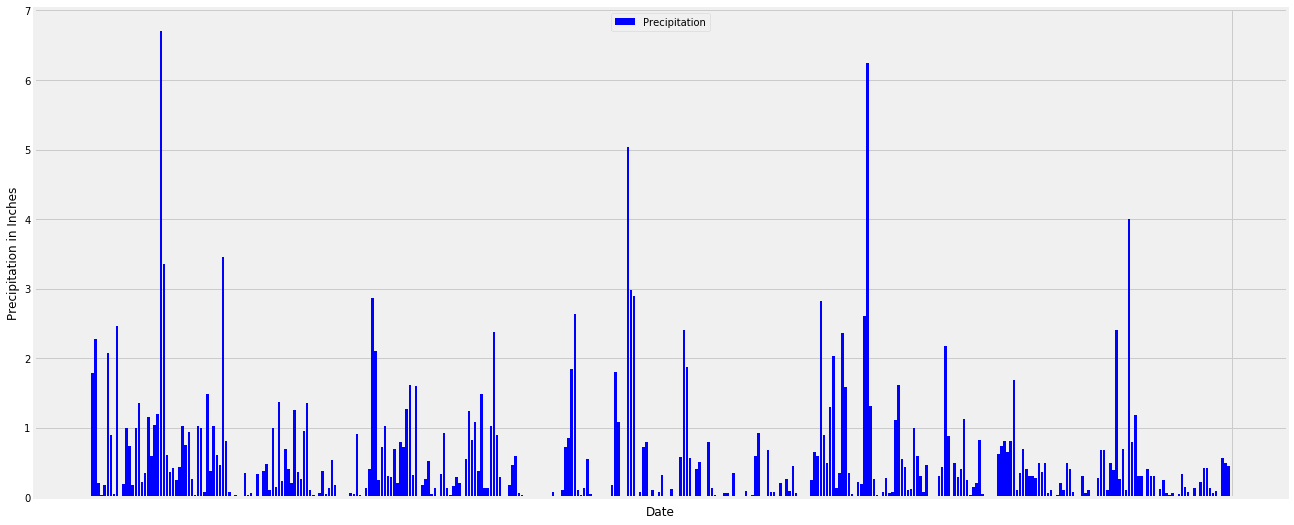

<Figure size 432x288 with 0 Axes>

In [29]:
test = renamed_results.fillna(0)
plt.figure(figsize=(20,9))
plt.bar(test['date'], test['prcp'], label='Precipitation', color='b')
plt.xlabel('Date')
plt.ylabel('Precipitation in Inches')
plt.xticks("") #removing the x_axis labels
plt.legend(loc='upper center')
plt.show()
plt.tight_layout()

In [30]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Need to figure out why I have more rows than the homework solution
# Answer: For some reason the homework solution includes 366 days rather than the prior year so that is 
# what I have done to recreate the results below
results_sort.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [31]:
# # Design a query to show how many stations are available in this dataset?
# stations = session.query(Measurement).count()
# print(stations)

cnt = (session.query(func.count(Measurement.station.distinct()).label("count"))
).scalar()
print (f'There are {cnt} stations in the dataset.')

There are 9 stations in the dataset.


In [32]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

stations = (session.query(Measurement.station, func.count(Measurement.station).label('count')).
            group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())
stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the station id from the previous query, calculate the lowest temperature recorded (min), 
# highest temperature recorded (max), and average temperature (avg) of the most active station?

mostActiveStats = (session.query(func.min(Measurement.tobs).label('min_temp'), func.max(Measurement.tobs)
                         .label('max_temp'), func.avg(Measurement.tobs).label('avg_temp'))
                         .filter(Measurement.station == 'USC00519281')).all()
mostActiveStats

[(54.0, 85.0, 71.66378066378067)]

In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
topStation = (session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= '2016-08-23')
                  .filter(Measurement.station == 'USC00519281').all())

In [35]:
# putting topStation into a DataFrame
#len(topStation) was 352
topStn = pd.DataFrame(topStation)
topStn.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


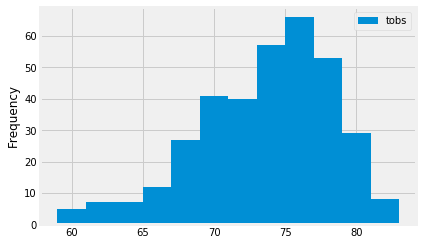

In [36]:
# plot the results as a histogram
hist = topStn.plot.hist(bins=12, legend='tobs')

# Temperature Analysis (Optional)

##### Function provided with a usage example

In [37]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


##### Function using the previous year for my dates (i.e. May 15, 2018 - May 30, 2018 will be May 15, 2017 - May 30, 2017)

In [38]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# For my analysis I will use May 15, 2018 through May 30, 2018

temps = calc_temps('2017-05-15', '2017-05-30')
print(temps)


[(68.0, 74.94505494505495, 87.0)]


##### Bar chart of the average temperature for the prior year vacation period plus error bar

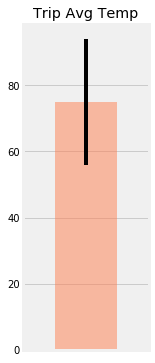

In [39]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
temp_list = [list(elem) for elem in temps]
# print(temp_list)
temp_df = pd.DataFrame(temp_list)
temp_df = temp_df.rename(columns={0:"TMIN", 1:'TAVG', 2:'TMAX'})
# temp_df.head()
error = temp_df['TMAX'] - temp_df['TMIN']
# print(error)
tavg = temp_df['TAVG']
# print(tavg)
plot = tavg.plot(kind='bar', position=-1, alpha=.5, figsize=(2,6), yerr=error, title='Trip Avg Temp', color='coral')


# Other Recommended Analysis (Optional)

In [40]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall = (session.query(Station.station, Station.name, Station.latitude, Station.longitude,
                          Station.elevation, func.sum(Measurement.prcp).label('total'))
            .filter(Station.station == Measurement.station)
            .filter(Measurement.date >= '2017-05-15')
            .filter(Measurement.date <= '2017-05-30')
            .filter(Measurement.prcp != '')
            .group_by(Station.station)
            .order_by(func.sum(Measurement.prcp).desc()).all())
print(rainfall)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 5.25), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 2.58), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 1.79), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.74), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.7200000000000001), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.5700000000000001)]


In [41]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [43]:
# setting up variables to hold user's vacation start and end dates
u_start = dt.date(2018, 5, 15)
u_end = dt.date(2018, 5, 30)
# function that takes the start and end dates and increment of time
def dateRange(start, end, delta):
    curr = start
    while curr < (end + dt.timedelta(days=1)):
        yield curr
        curr += delta
# creating a list to hold the results of the function
vacaDates = []
# appending the list of values for the vacation days
for result in dateRange(u_start, u_end, dt.timedelta(days=1)):
    vacaDates.append(str(result))
print(vacaDates)
 

['2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18', '2018-05-19', '2018-05-20', '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28', '2018-05-29', '2018-05-30']


In [44]:
# this module provides regular expression matching operations
import re
# creating a list to hold month and day values
fmtVacaDates = []
# looping through vacation dates and grabbing the month and days and putting 
# them into a new list with vacation dates formated as %m-%d in order to use the daily normals function provided
for item in vacaDates:
    # findall finds all substrings where teh regular expression matches and returns them as a list
    # \d+ means it will match one or mor instances of any digit
    numbers = re.findall('\d+', item)
    fmtVacaDates.append(numbers[1] + '-' + numbers[2])
print(fmtVacaDates)

['05-15', '05-16', '05-17', '05-18', '05-19', '05-20', '05-21', '05-22', '05-23', '05-24', '05-25', '05-26', '05-27', '05-28', '05-29', '05-30']


In [45]:
# Loop through the list of %m-%d strings and calculate the normals for each date
dly_normal_values = []
for item in fmtVacaDates:
    value = daily_normals(item)
    for x in value:
        dly_normal_values.append({'trip_dates': item, 'tmin': x[0], 'tavg': x[1], 'tmax': x[2]})
# print(dly_normal_values)


In [46]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
load_results = pd.DataFrame(dly_normal_values)
load_results.head()

,tavg,tmax,tmin,trip_dates
0,73.690909,79.0,63.0,05-15
1,74.379310,80.0,68.0,05-16
2,74.450000,79.0,68.0,05-17
3,74.107143,82.0,68.0,05-18
4,73.807018,79.0,65.0,05-19


In [47]:
#resetting the index to the date column per homework instructions
load_results_dt = load_results.set_index('trip_dates')
load_results_dt.head()

,tavg,tmax,tmin
trip_dates,,,
05-15,73.690909,79.0,63.0
05-16,74.379310,80.0,68.0
05-17,74.450000,79.0,68.0
05-18,74.107143,82.0,68.0
05-19,73.807018,79.0,65.0


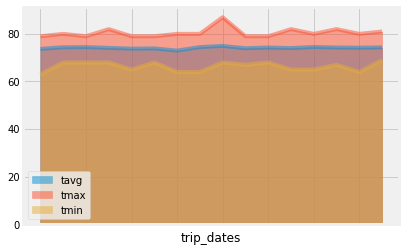

In [48]:
# Plot the daily normals as an area plot with `stacked=False`
load_results_dt.plot(kind='area', stacked=False)